In [ ]:
%matplotlib                    # Pyplot 그래프 새창에서 열기 옵션

In [ ]:
%matplotlib inline             # Pyplot 그래프 새창에서 열기 '취소' 옵션

In [7]:
pd.set_option('display.max_rows',    100)      # DataFrame 데이터 확인 시 최대 표시 행 수
pd.set_option('display.max_columns', 1400)      # DataFrame 데이터 확인 시 최대 표시 열 수

## 라이브러리 import

In [1]:
import numpy       as np
import pandas      as pd
import matplotlib.pyplot as plt
import pywt

## 데이터 불러오기

In [2]:
Data = pd.read_csv('./ExampleData', sep=',', header=None)
Data.shape

(2774, 4)

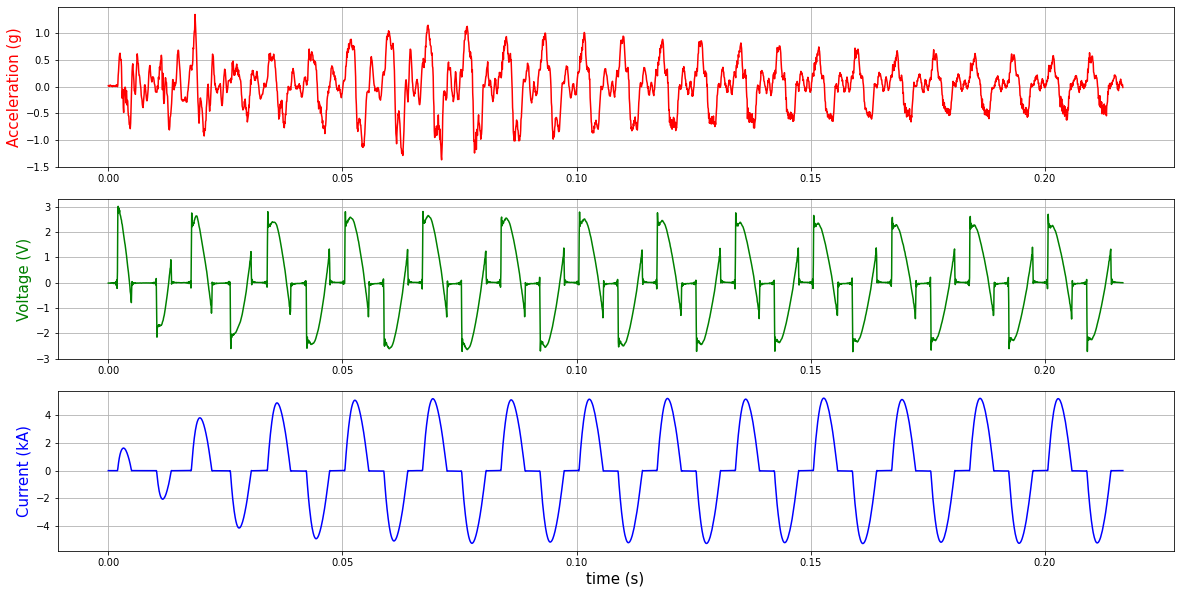

In [3]:
# 예제데이터 센서데이터 (1열 ~ 3열)
plt.figure(figsize=(20,10))

plt.subplot(3,1,1) # 가속도 데이터
plt.plot(Data.iloc[:,0] , Data.iloc[:,1], color='r')
plt.ylabel('Acceleration (g)',fontsize=15, color='r')
plt.grid()

plt.subplot(3,1,2)# 전압 데이터 
plt.plot(Data.iloc[:,0] , Data.iloc[:,2], color='g')
plt.ylabel('Voltage (V)',fontsize=15, color='g')
plt.grid()

plt.subplot(3,1,3) # 전류 데이터
plt.plot(Data.iloc[:,0] , Data.iloc[:,3], color=[0,0,1])
plt.ylabel('Current (kA)',fontsize=15, color='b')
plt.xlabel('time (s)',fontsize=15)
plt.grid()

plt.show()

## Wavelet Transform 수행

Wavelet Transfrom 실행 위한 파라미터 설정

In [4]:
MotherWavelet = pywt.Wavelet('haar')
Level  = 8

Wavelet Transform 실행 : Coefficient 생성

In [5]:
Coefficient = pywt.wavedec(Data.iloc[:,1], MotherWavelet, level=Level, axis=0)
Coefficient

[array([ 0.54008014, -0.43849606,  0.64641014, -0.58882944,  0.21826427,
         1.03349269, -0.59162231,  0.71136674, -0.15570261,  0.29655482,
         0.35771674]),
 array([-0.39941931, -0.66254956, -0.58043993,  1.58064144,  0.2701227 ,
         0.32972161, -1.00764231, -0.33675579,  0.89845737, -0.10839758,
         0.44996606]),
 array([-0.78121239, -0.72912923, -0.80643035,  1.13923297,  1.97391912,
        -1.21379812, -2.01577971, -1.53220113,  1.7523018 ,  2.43528737,
        -1.04301312, -1.80380358, -1.23719498,  1.51300865,  1.92252109,
        -0.79806885, -1.42410069, -0.91804625,  1.14848588,  1.5817931 ,
        -0.60477819, -0.59126559]),
 array([ 1.09475111,  0.26320425,  0.8717445 , -1.28149555, -1.08745782,
         1.47733419, -0.32415436,  0.12466161, -1.4369963 , -1.99509826,
         4.47296765, -0.89436459,  0.9082195 , -1.647475  , -2.55667825,
         5.12172938, -1.07081691,  0.37626125, -1.62317675, -2.09802558,
         4.2517755 , -1.1191462 ,  0.10194

In [8]:
# 데이터 프레임 형태로 확인
Coefficient_df = pd.DataFrame(Coefficient)
Coefficient_df

0         1         2         3         4         5         6     \
0  0.540080 -0.438496  0.646410 -0.588829  0.218264  1.033493 -0.591622   
1 -0.399419 -0.662550 -0.580440  1.580641  0.270123  0.329722 -1.007642   
2 -0.781212 -0.729129 -0.806430  1.139233  1.973919 -1.213798 -2.015780   
3  1.094751  0.263204  0.871745 -1.281496 -1.087458  1.477334 -0.324154   
4 -0.353982  1.428363  0.388690 -0.810493 -0.047863 -1.817716  0.339837   
5  0.015144 -0.508646  0.904276  0.618959  0.098254  1.031599 -0.030381   
6 -0.012560 -0.002248 -0.006743 -0.576419  0.739831 -0.328537  0.250664   
7  0.003553  0.005235  0.006170 -0.004861  0.002431 -0.015705 -0.104889   
8  0.001851  0.011105 -0.003966 -0.003437 -0.003437  0.011105 -0.005289   

       7         8         9         10        11        12        13    \
0  0.711367 -0.155703  0.296555  0.357717       NaN       NaN       NaN   
1 -0.336756  0.898457 -0.108398  0.449966       NaN       NaN       NaN   
2 -1.532201  1.752302  2.435287 -1.043013 -1.803804 -1.237195  1.513009   
3  0.124662 -1.436996 -1.995098  4.472968 -0.894365  0.908220 -1.647475   
4  2.334193 -1.781095  0.152370 -0.679746  1.465847 -0.032451 -1.333177   
5  0.233711 -0.645789  0.525196 -0.116297 -0.607836  1.115365 -0.616437   
6 -0.155609  0.206636 -0.693559  0.375862  0.340036 -0.177423 -0.413417   
7 -0.211085  0.081705  0.336358  0.123779 -0.064878  0.010846  0.240445   
8 -0.006875  0.001587  0.007139 -0.002909  0.016129  0.016923 -0.124010   

       14        15        16        17        18        19        20    \
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2  1.922521 -0.798069 -1.424101 -0.918046  1.148486  1.581793 -0.604778   
3 -2.556678  5.121729 -1.070817  0.376261 -1.623177 -2.098026  4.251776   
4  2.139637 -1.323850 -0.120507  0.845203 -0.772882  0.909651 -1.363385   
5 -1.243552  0.940920 -0.439190 -1.078996  0.309718 -0.392075 -0.160792   
6  0.290458  0.113040 -0.037545 -0.392130  0.590045 -0.383270  0.730576   
7  0.080960 -0.374685 -0.258393  0.241380 -0.003741 -0.277460  0.129385   
8 -0.106823 -0.038339  0.058435 -0.002114  0.259654 -0.099686  0.245640   

       21        22        23        24        25        26        27    \
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2 -0.591266       NaN       NaN       NaN       NaN       NaN       NaN   
3 -1.119146  0.101946 -1.233528 -2.132989  3.656974 -0.703607  0.458913   
4  1.815679 -0.190046 -2.029708  3.959210 -2.617994 -0.323776  2.514703   
5 -0.008320  0.686742  0.334398 -0.652426  0.410958 -0.350380 -0.617371   
6 -0.526713  0.139610 -0.632477  0.597181  0.006081  0.081172 -0.435486   
7  0.092174  0.178183  0.099280 -0.222122  0.136112 -0.000370 -0.275031   
8 -0.193288  0.037811  0.016922 -0.148071  0.187208  0.007927  0.059227   

       28        29        30        31        32        33        34    \
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3 -1.161215 -1.810235  3.027449 -0.835514  0.425819 -0.840941 -1.673844   
4 -1.728460  0.579926 -1.294445  0.557794  0.607425 -1.321279  3.713315   
5  0.892219 -0.028233 -0.973454 -0.280262  0.039731 -0.378238 -0.344865   
6 -0.036098 -0.455741  1.207975 -0.232946  0.423331 -0.686685  0.398209   
7 -0.001685  0.081515 -0.006730  0.092172  0.047676 -0.101152 -0.106195   
8  0.095714 -0.027238 -0.074034 -0.120046 -0.175833 -0.028822  0.054999   

       35        36        37        38        39        40        41    \
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2       NaN       NaN      

각 WT Coefficent (주파수 영역별 신호) 별 데이터 사이즈 확인

In [9]:
print('Size of a',Level, ' = ', len(Coefficient[0]))  # 첫번째 Coefficient : 최저주파수 신호 (a-최대레벨)

for i in range(1,Level+1):
    print('Size of d',Level+1-i , ' = ', len(Coefficient[i])) # 두번째 Coefficient(d-최대레벨) ~ 마지막 Coefficient(d1)
    

Size of a 8  =  11
Size of d 8  =  11
Size of d 7  =  22
Size of d 6  =  44
Size of d 5  =  87
Size of d 4  =  174
Size of d 3  =  347
Size of d 2  =  694
Size of d 1  =  1387


### Wavelet Transfrom 결과 그래프 확인

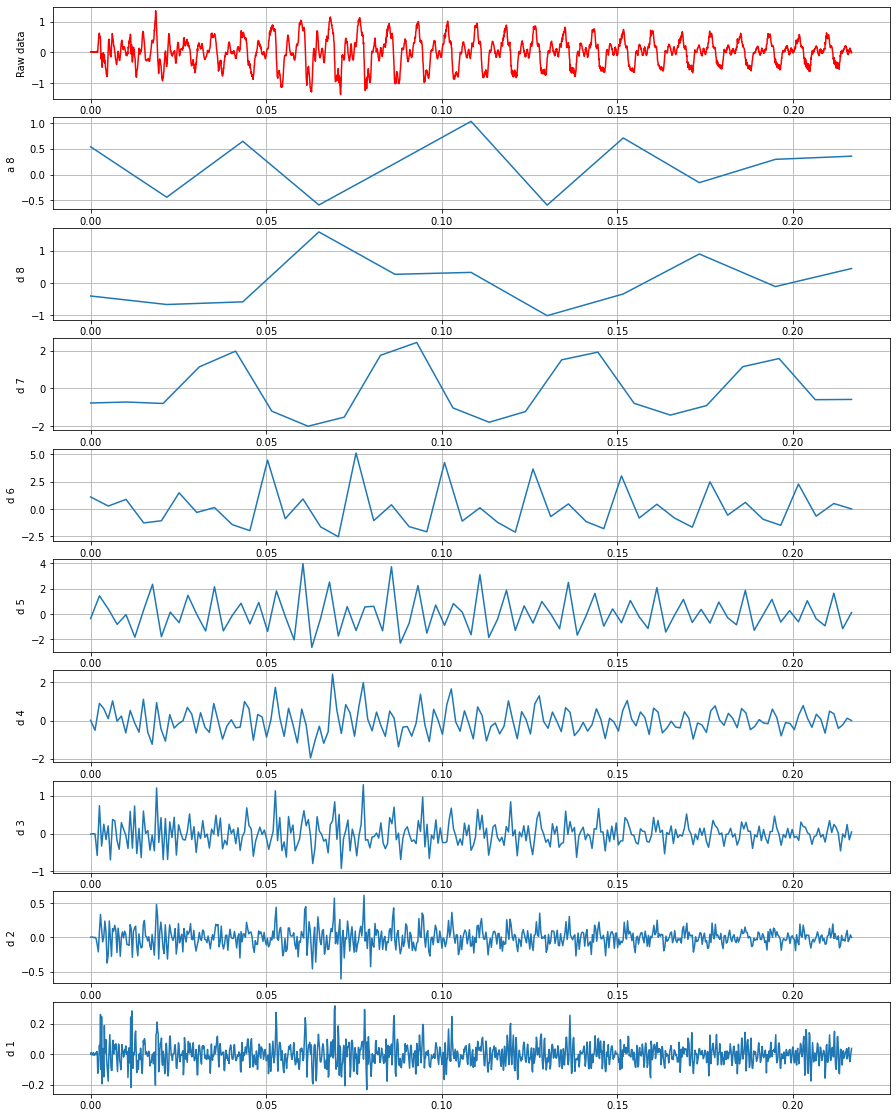

In [10]:
plt.figure(figsize=(15,20))

plt.subplot(Level+2,1,1)
plt.plot(Data.iloc[:,0] , Data.iloc[:,1], color='r')
plt.ylabel('Raw data')
plt.grid()

plt.subplot(Level+2,1,2)
Time_temp = np.arange( 0 , 0.2167 + 0.2167/(len(Coefficient[0])-1) , 0.2167/(len(Coefficient[0])-1) )
plt.plot(Time_temp , Coefficient[0])
plt.ylabel('a %d' %(Level))
plt.grid()

for k in range(1,Level+1):
    plt.subplot(Level+2,1,k+2)
    Time_temp = np.arange( 0 , 0.2167 + 0.2167/(len(Coefficient[k])-1) , 0.2167/(len(Coefficient[k])-1) )
    plt.plot(Time_temp , Coefficient[k])
    plt.ylabel('d %d'%(Level+1-k))
    plt.grid()

plt.show()